# MACHINE LEARNING COM BASE CORPUS 

In [4]:
import pandas as pd
import nltk.corpus
import re
import string
import spacy


In [5]:
df = pd.read_csv('pre-processed.csv',sep=';')
df = df[['preprocessed_news','label']]
df = df.dropna()
df['label'] = df['label'].astype(int)
df

,preprocessed_news,label
0,katia abreu diz vai colocar expulsao moldura n...,0
1,ray peita bolsonaro conservador fake entrevist...,0
2,reinaldo azevedo desmascarado policia federal ...,0
3,relatorio assustador bndes mostra dinheiro pub...,0
4,radialista americano fala sobre pt vendem ilus...,0
...,...,...
7196,jornal britanico acao contra lula lava jato se...,1
7197,temer diz acionou pf cade investigar aumentos ...,1
7198,obstaculos politicos temer especialistas ouvid...,1
7199,setembro boa noite aqui estao principais notic...,1


In [6]:
nlp = spacy.load('pt_core_news_sm')

def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text

### Aplicar lematização 

In [8]:
df['preprocessed_news'] = df['preprocessed_news'].apply(lemmatize_text)


In [9]:
base = df.rename(columns={'preprocessed_news': 'Noticia'})
base

,Noticia,label
0,katia abrer dizer ir colocar expulsao moldura ...,0
1,Ray peito bolsonaro conservador Fake Entrevist...,0
2,reinaldo azevedo desmascarar policia federal f...,0
3,relatorio assustador bnde mostrar dinheiro pub...,0
4,radialista americano falar sobre pt vender ilu...,0
...,...,...
7196,jornal britanico acao contra Lula lava jato se...,1
7197,temer dizer acionar pf cade investigar aumento...,1
7198,obstaculo politico temer especialista ouvir av...,1
7199,setembro bom noite aqui estao principal notici...,1


## TREINAMENTO - Utilizando Bag of Words

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier




In [10]:

X = base['Noticia']  # Coluna com o texto das notícias
y = base['label']  # Coluna com os rótulos (0 para falsa, 1 para verdadeira)


# Vetorização dos recursos usando TF-IDF
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Divisão do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
model = MultinomialNB()
model.fit(X_train, y_train)

# Predição no conjunto de teste
y_pred = model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Acurácia: 0.8263888888888888
Precisão: 0.760485651214128
Recall: 0.9542936288088643
F1-score: 0.8464373464373464


In [18]:
models = [
    MultinomialNB(),
    SVC(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),

    LogisticRegression(),
    RandomForestClassifier(),
    MLPClassifier(),
    XGBClassifier()
]

for model in models:
    # Treinamento do modelo
    model.fit(X_train, y_train)

    # Predição no conjunto de teste
    y_pred = model.predict(X_test)

    # Avaliação do modelo
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Modelo:", model.__class__.__name__)
    print("Acurácia:", accuracy)
    print("Precisão:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print()

    # Cálculo da matriz de confusão
    confusion = confusion_matrix(y_test, y_pred)

    print("Matriz de Confusão:")
    print(confusion)
    print()
    

Modelo: MultinomialNB
Acurácia: 0.8263888888888888
Precisão: 0.760485651214128
Recall: 0.9542936288088643
F1-score: 0.8464373464373464

Matriz de Confusão:
[[501 217]
 [ 33 689]]

Modelo: SVC
Acurácia: 0.95625
Precisão: 0.9608391608391609
Recall: 0.9515235457063712
F1-score: 0.9561586638830898

Matriz de Confusão:
[[690  28]
 [ 35 687]]

Modelo: KNeighborsClassifier
Acurácia: 0.7020833333333333
Precisão: 1.0
Recall: 0.40581717451523547
F1-score: 0.5773399014778325

Matriz de Confusão:
[[718   0]
 [429 293]]

Modelo: GradientBoostingClassifier
Acurácia: 0.9430555555555555
Precisão: 0.9419889502762431
Recall: 0.9445983379501385
F1-score: 0.9432918395573997

Matriz de Confusão:
[[676  42]
 [ 40 682]]



c:\Users\vande\anaconda3\envs\article\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Modelo: LogisticRegression
Acurácia: 0.9597222222222223
Precisão: 0.9649859943977591
Recall: 0.9542936288088643
F1-score: 0.9596100278551533

Matriz de Confusão:
[[693  25]
 [ 33 689]]

Modelo: RandomForestClassifier
Acurácia: 0.9465277777777777
Precisão: 0.9777777777777777
Recall: 0.9141274238227147
F1-score: 0.9448818897637795

Matriz de Confusão:
[[703  15]
 [ 62 660]]

Modelo: MLPClassifier
Acurácia: 0.9222222222222223
Precisão: 0.9607250755287009
Recall: 0.8808864265927978
F1-score: 0.9190751445086706

Matriz de Confusão:
[[692  26]
 [ 86 636]]

Modelo: XGBClassifier
Acurácia: 0.9513888888888888
Precisão: 0.9429347826086957
Recall: 0.961218836565097
F1-score: 0.9519890260631002

Matriz de Confusão:
[[676  42]
 [ 28 694]]



c:\Users\vande\anaconda3\envs\article\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


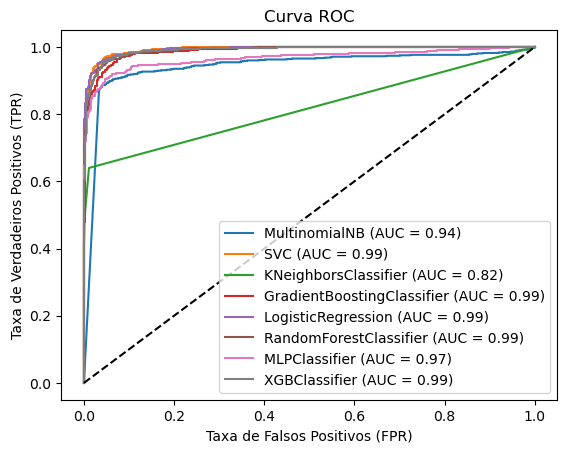

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

for model in models:
    model.fit(X_train, y_train)
    
    # Verificar se o modelo suporta cálculo de probabilidade
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        
        plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model.__class__.__name__, auc))
    else:
        # Se o modelo não suportar cálculo de probabilidade, use a função de decisão para calcular as pontuações
        y_scores = model.decision_function(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_scores)
        auc = roc_auc_score(y_test, y_scores)
        
        plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model.__class__.__name__, auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


MultinomialNB()


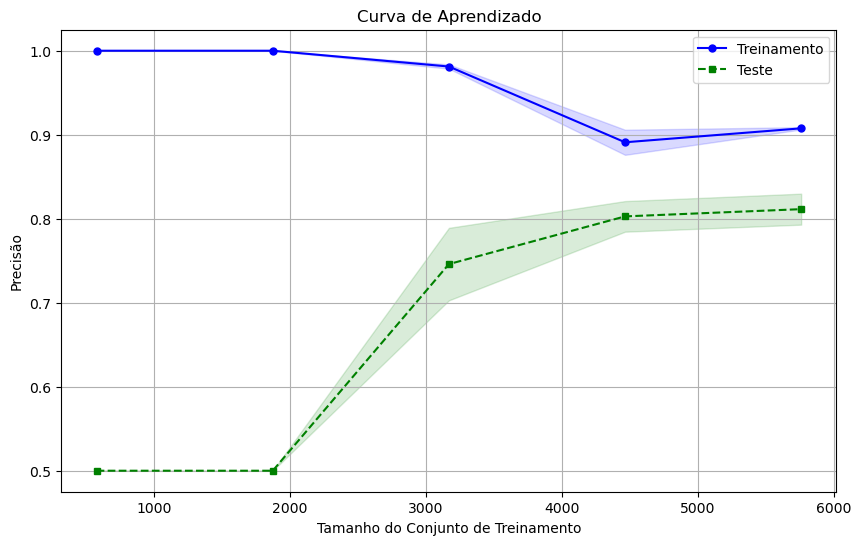

LogisticRegression()


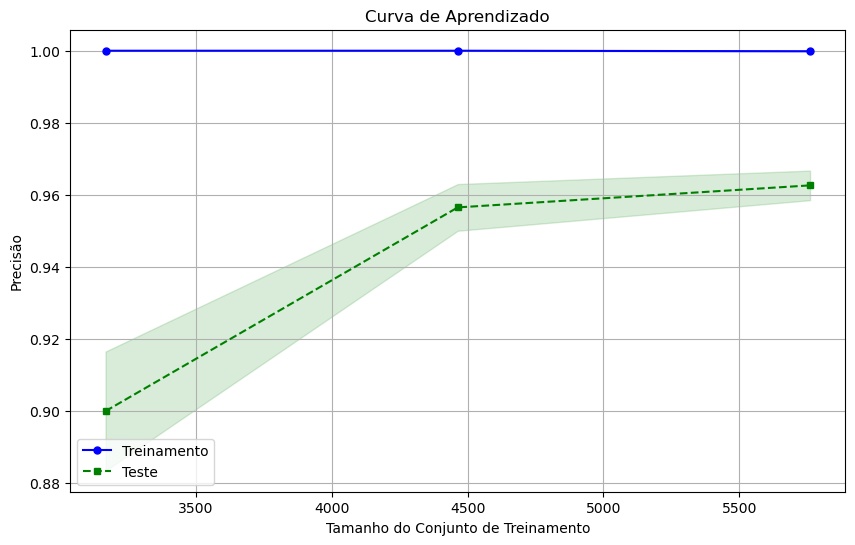

SVC()


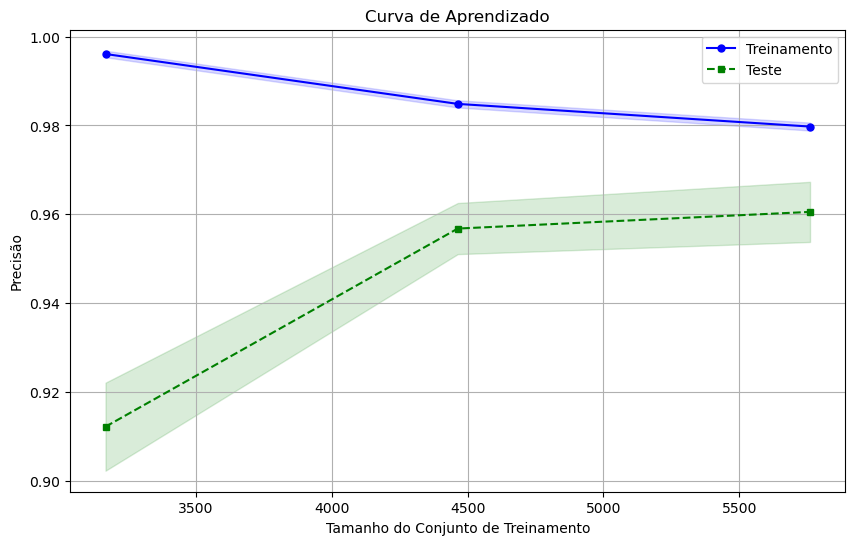

RandomForestClassifier()


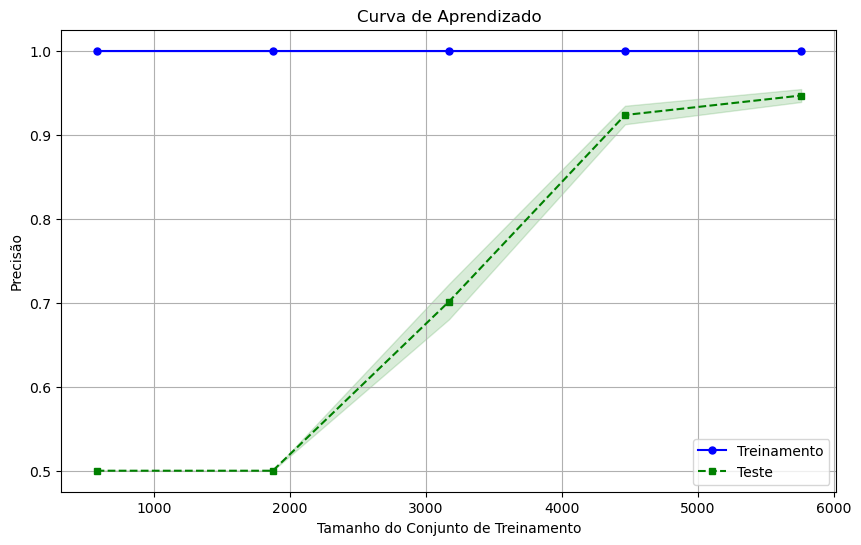

KNeighborsClassifier()


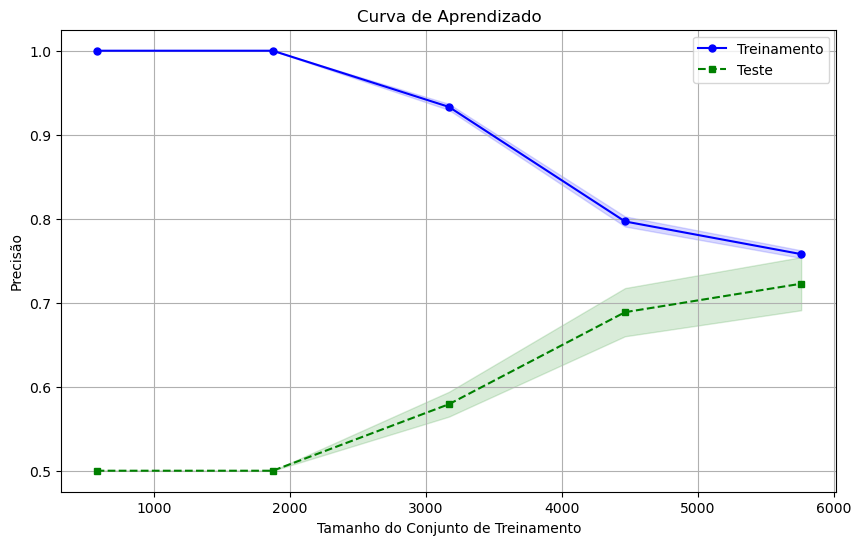

MLPClassifier()


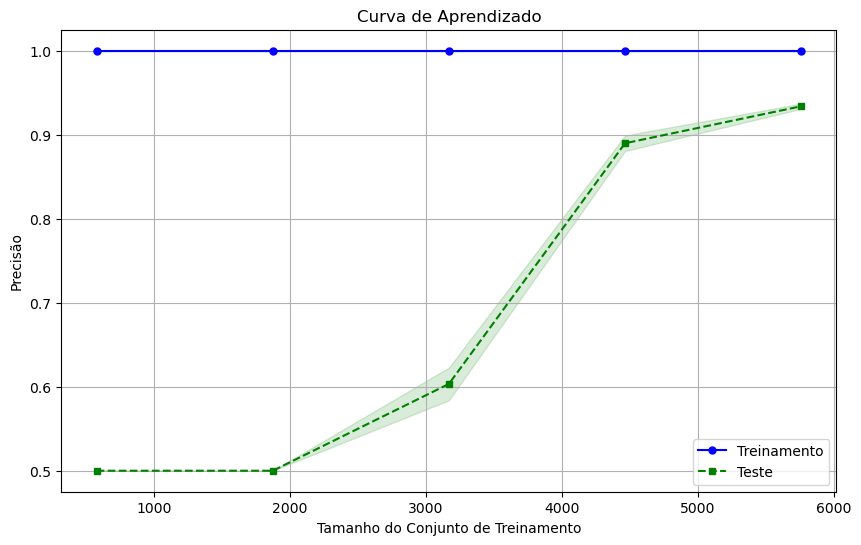

GradientBoostingClassifier()


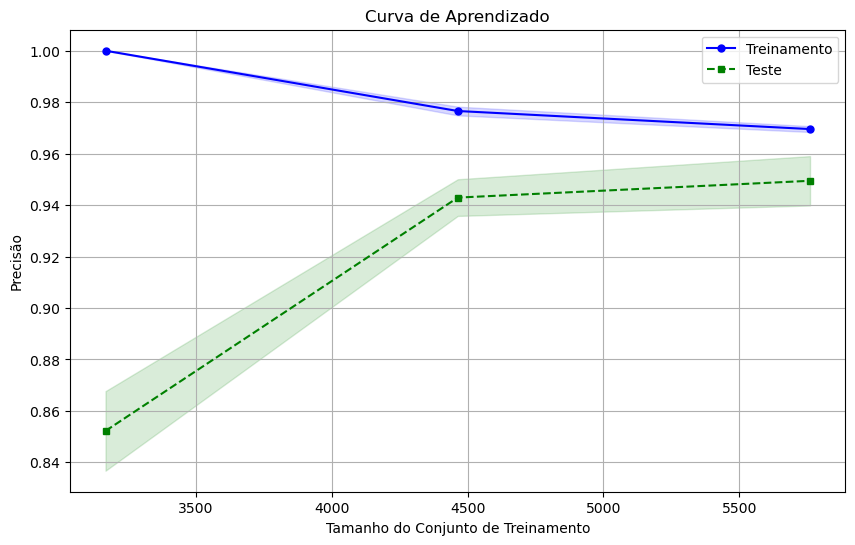

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


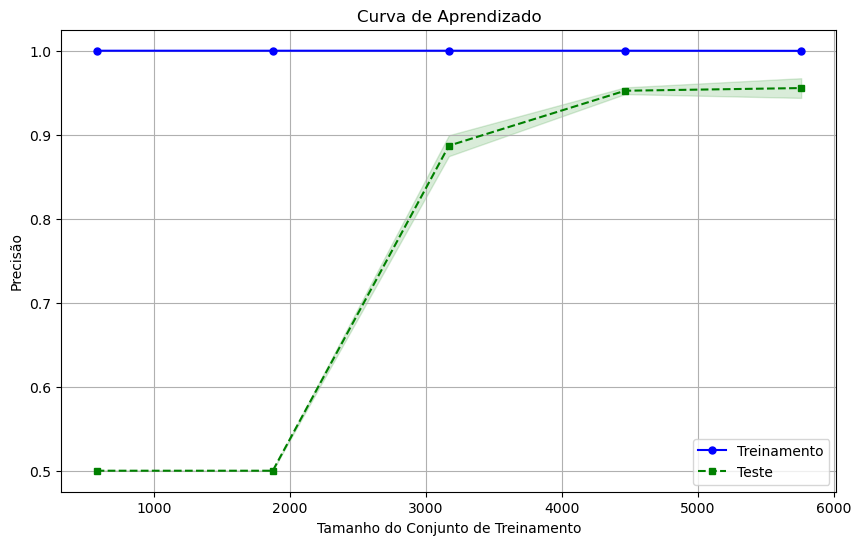

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Função para plotar a curva de aprendizado
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
    
    # Média e desvio padrão dos scores de treinamento e teste
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Plotagem da curva de aprendizado
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Treinamento')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Teste')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    
    print(model)
    plt.title('Curva de Aprendizado')
    plt.xlabel('Tamanho do Conjunto de Treinamento')
    plt.ylabel('Precisão')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


# Plotar curvas de aprendizado para cada modelo
for model in models:
    plot_learning_curve(model, X, y)

## TESTANDO NOTÍCIAS FALSAS

In [20]:
stopwords_br = nltk.corpus.stopwords.words('portuguese')
#stopwords_br

In [24]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [26]:
def manual_testing2(model,news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)

    nlp = spacy.load('pt_core_news_sm')
    doc = nlp(new_def_test["text"].iloc[0])
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    new_x_test = [lemmatized_text]
    
    #new_x_test = new_def_test["text"]
    new_xv_test = vectorizer.transform(new_x_test)
    pred_LR = model.predict(new_xv_test)
    #pred_NB = NB.predict(new_xv_test)
   

    return pred_LR

In [27]:
teste = pd.read_excel('noticias.xlsx')
teste['noticia'] = teste['noticia'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords_br]))
teste

,noticia,label
0,"“Presidente Estados Unidos. premiado camisa, b...",fake
1,“MARÍLIA GABRIELA INDIGNADA. Caramba. Mulher c...,fake
2,“Nunca Bolsonaro perdeu eleição.Um ex presiden...,fake
3,"“Após adesão Finlândia OTAN fronteira Vyborg ,...",fake
4,"“Estados Unidos, rompem relação Brasil enquant...",fake
...,...,...
960,“A melhor parte reunião: ‘Se precisar apoio pe...,fake
961,“Essa casa João Doria”,fake
962,"“A convite Helder, Mandetta chega Belém reforç...",fake
963,"“Já sabia, brasileiro gosta traíra”",fake


In [28]:
for model in models:
    
    print(model)
    fake = 0
    true = 0

    for i in teste['noticia']:
        x = manual_testing2(model,i)
        if x == 0:
            #print('Fake News')
            fake += 1
        else:
            #print('Not a Fake News')
            true += 1

    print('Fake: ',fake)
    print('True: ',true)

MultinomialNB()
Fake:  531
True:  434
LogisticRegression()
Fake:  965
True:  0
SVC()
Fake:  965
True:  0
RandomForestClassifier()
Fake:  965
True:  0
KNeighborsClassifier()
Fake:  965
True:  0
MLPClassifier()
Fake:  962
True:  3
GradientBoostingClassifier()
Fake:  965
True:  0
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=

## TESTANDO NOTICIAS VERDADEIRAS

In [29]:
teste_true = pd.read_excel('noticias-true.xlsx')
teste_true = teste_true[['noticia','label']]
teste_true['noticia'] = teste_true['noticia'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords_br]))
teste_true

,noticia,label
0,"['O líder União Brasil Câmara, Elmar Nasciment...",True
1,['Escolhido dedo todo-poderoso xará Arthur Lir...,True
2,"['O advogado Cristiano Zanin defendeu que, cas...",True
3,"['Luciano Ferreira Cavalcante, ex-assessor Art...",True
4,['Um dia antes TSE (Tribunal Superior Eleitora...,True
...,...,...
908,['O presidente Luiz Inácio Lula Silva deve esc...,True
909,['O ex-deputado federal Deltan Dallagnol (Pode...,True
910,['A CPI MST reuniu terceira vez hoje votar req...,True
911,['O presidente Lula (PT) preteriu duas mulhere...,True


In [31]:
for model in models:
    
    print(model)
    fake = 0
    true = 0

    for i in teste_true['noticia']:
        x = manual_testing2(model,i)
        if x == 0:
            #print('Fake News')
            fake += 1
        else:
            #print('Not a Fake News')
            true += 1

    print('Fake: ',fake)
    print('True: ',true)

MultinomialNB()
Fake:  765
True:  148
LogisticRegression()
Fake:  880
True:  33
SVC()
Fake:  878
True:  35
RandomForestClassifier()
Fake:  885
True:  28
KNeighborsClassifier()
Fake:  911
True:  2
MLPClassifier()
Fake:  847
True:  66
GradientBoostingClassifier()
Fake:  885
True:  28
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predi